In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("../../input/train.csv")
test = pd.read_csv("../../input/test.csv")

In [3]:
y = train["SalePrice"]
train = train.drop("SalePrice", axis=1)

In [4]:
data = pd.concat([train, test], axis=0).drop(["Id"], axis=1)

In [5]:
data["RatioArea_GrLivArea"] = data.groupby("Neighborhood")["GrLivArea"].transform(lambda x: x/x.mean())
data["RatioArea_TotalBsmtSF"] = data.groupby("Neighborhood")["TotalBsmtSF"].transform(lambda x: x/x.mean())
data["RatioArea_1stFlrSF"] = data.groupby("Neighborhood")["1stFlrSF"].transform(lambda x: x/x.mean())
data["RatioArea_GarageArea"] = data.groupby("Neighborhood")["GarageArea"].transform(lambda x: x/x.mean())
data["RatioArea_BsmtFinSF1"] = data.groupby("Neighborhood")["BsmtFinSF1"].transform(lambda x: x/x.mean())
data["RatioArea_OpenPorchSF"] = data.groupby("Neighborhood")["OpenPorchSF"].transform(lambda x: x/x.mean())
data["RatioArea_LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x/x.mean())
data["RatioArea_MasVnrArea"] = data.groupby("Neighborhood")["MasVnrArea"].transform(lambda x: x/x.mean())

data["RatioArea_LotArea"] = data.groupby("Neighborhood")["LotArea"].transform(lambda x: x/x.mean())

data["RatioArea_YearBuilt"] = data.groupby("Neighborhood")["YearBuilt"].transform(lambda x: x/x.mean())
data["RatioArea_TotRmsAbvGrd"] = data.groupby("Neighborhood")["TotRmsAbvGrd"].transform(lambda x: x/x.mean())
data["RatioArea_TotalBsmtSF"] = data.groupby("Neighborhood")["TotalBsmtSF"].transform(lambda x: x/x.mean())

In [6]:
AreaMapper = {'CollgCr':2, 'Veenker':2, 'Crawfor':2, 'NoRidge':3, 'Mitchel':1, 'Somerst':2,
       'NWAmes':1, 'OldTown':1, 'BrkSide':1, 'Sawyer':1, 'NridgHt':3, 'NAmes':1,
      'SawyerW':1, 'IDOTRR':0, 'MeadowV':0, 'Edwards':1, 'Timber':2, 'Gilbert':2,
       'StoneBr':2, 'ClearCr':2, 'NPkVill':1, 'Blmngtn':2, 'BrDale':1, 'SWISU':1,
       'Blueste':1}
data["Neighbor_mapped"] = data["Neighborhood"].map(AreaMapper)

In [7]:
size_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA": 0, "GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "GdPrv": 2, "MnPrv":1, "GdWo": 2, "MnWw": 1}
for c in ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", "Fence"]:
    data[c+"_mapped"] = data[c].map(size_mapping)

In [8]:
num_df = data.select_dtypes(exclude=['object'])

In [9]:
num_df["TotBath"] = num_df["FullBath"]+num_df["HalfBath"]
num_df["ratio_fi"] = num_df["2ndFlrSF"]/num_df["GrLivArea"]

num_df["diff_build_Reno"] = num_df["YearBuilt"] - num_df["YearRemodAdd"]
num_df["GarageOld"] = num_df["YrSold"] - num_df["GarageYrBlt"]
num_df["HouseOld"] = num_df["YrSold"] - num_df["YearBuilt"]
num_df["HouseOld"] = num_df["YrSold"] - num_df["YearBuilt"]
num_df["SF_open_ratio"] = num_df["WoodDeckSF"] / num_df["EnclosedPorch"] 
num_df["RoomFireplacesRatio"] = num_df["Fireplaces"] / num_df["TotRmsAbvGrd"]

num_df["BadRoomRatio"] =num_df["LowQualFinSF"]/(num_df["1stFlrSF"]+num_df["2ndFlrSF"])
num_df["ratio_Bsmt"] = num_df["TotalBsmtSF"] / (num_df["1stFlrSF"] + num_df["2ndFlrSF"])

num_df["ratio_kitchen"] = num_df["KitchenAbvGr"] / num_df["TotRmsAbvGrd"]
num_df["ratio_Bedroom"] = num_df["BedroomAbvGr"] / num_df["TotRmsAbvGrd"]
num_df["ratio_Bathroom"] = num_df["TotBath"] / num_df["TotRmsAbvGrd"]
num_df["OtherRooms"] = num_df["TotRmsAbvGrd"] - num_df["KitchenAbvGr"] - num_df["BedroomAbvGr"]
num_df["TotBsmtBath"] = num_df["BsmtFullBath"]+num_df["BsmtHalfBath"]




/home/ravrik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ravrik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ravrik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [10]:
for c in ["OverallCond", "OverallQual","MSSubClass", "MoSold", "YrSold"]:
    data[c] = data[c].apply(str)

In [11]:
cat_df =  data.select_dtypes(include=['object'])

In [12]:
cat_df = pd.get_dummies(cat_df)

In [13]:
X = pd.concat([num_df, cat_df], axis=1)

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import KFold

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

for i, c in enumerate(X.columns):
    print(i/len(X.columns), "%finished")
    if X[c].isnull().sum() == 0:
        continue
    else:
        elasticnet = make_pipeline(RobustScaler(),
                                            ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                        cv=kfolds, random_state=42, l1_ratio=e_l1ratio))
        elasticnet.fit(X.loc[~(X[c].isnull()), ~(X.isnull().any())], X.loc[~(X[c].isnull()), c])
        X.loc[X[c].isnull(), c] = elasticnet.predict(X.loc[X[c].isnull(), ~(X.isnull().any())])

0.0 %finished
0.002638522427440633 %finished
0.005277044854881266 %finished
0.0079155672823219 %finished
0.010554089709762533 %finished
0.013192612137203167 %finished
0.0158311345646438 %finished
0.018469656992084433 %finished


In [566]:
train_X = X.iloc[:train.shape[0], :]
test_X = X.iloc[train.shape[0]:, :]

In [567]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [570]:
lgb_reg = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
lgb_reg.fit(train_X, y)

LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=7,
       importance_type='split', learning_rate=0.01, max_bin=200,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=5000, n_jobs=-1, num_leaves=4,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [571]:
sub = pd.read_csv("../../input/sample_submission.csv")
sub["SalePrice"] = lgb_reg.predict(test_X)

In [572]:
sub.to_csv("predic_fill_lgbm_sub.csv", index=False)

In [411]:
fe_map =  dict(zip(list(train_X.columns), lgb_reg.feature_importances_))

In [608]:
print(sorted(fe_map.items(), key=lambda x: x[1])[:10])

[('PoolArea', 0), ('MiscVal', 0), ('PoolQC_mapped', 0), ('MSSubClass_150', 0), ('MSSubClass_160', 0), ('MSSubClass_180', 0), ('MSSubClass_190', 0), ('MSSubClass_40', 0), ('MSSubClass_45', 0), ('MSSubClass_75', 0)]


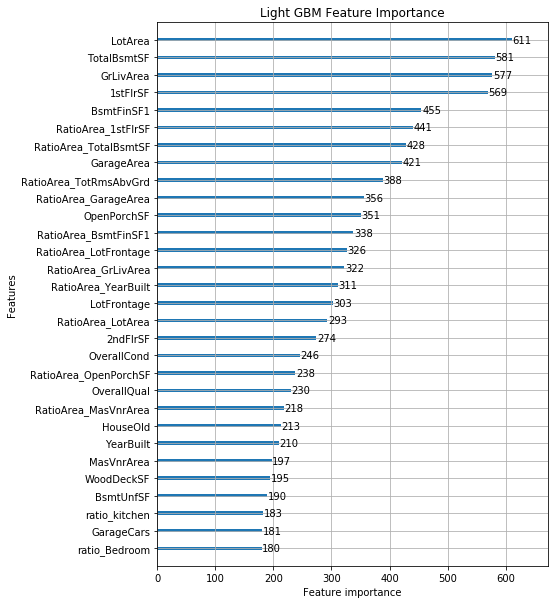

In [543]:
f, ax = plt.subplots(figsize=[7,10])
lgb.plot_importance(lgb_reg, max_num_features=30,  ax=ax)
plt.title("Light GBM Feature Importance")
plt.savefig('feature_import.png')